In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [11]:
state0 = xr.open_dataset('/Users/weiyangbao/Documents/Model_outputs/drag_010/state_007.nc')
state = state0.isel(Y = range(1,10)) # Remove the boundary walls in y direction


In [12]:
Hs = 10
Qsg = 700 # subglacial discharge
x_sill = 28
xdist = state.X.data / 1000
depth = state.Z.data
time = state.T.data / 86400
pt = state.Temp.data.mean(2) # dims = T, Z, X
u0 = state.U.data # dims = T, Z, Y, Xp1
u_ymean = (u0[:, :, :, 1:].mean(2) + u0[:, :, :, :-1].mean(2)) / 2
u = u_ymean.mean(0) # Time average
np.shape(u_ymean)
depth

array([  -0.25,   -0.75,   -1.25,   -1.75,   -2.25,   -2.75,   -3.25,
         -3.75,   -4.25,   -4.75,   -5.5 ,   -6.5 ,   -7.5 ,   -8.5 ,
         -9.5 ,  -10.5 ,  -11.5 ,  -12.5 ,  -13.5 ,  -14.5 ,  -15.75,
        -17.25,  -18.75,  -20.25,  -21.75,  -23.25,  -24.75,  -26.25,
        -27.75,  -29.25,  -32.  ,  -36.  ,  -40.  ,  -44.  ,  -48.  ,
        -52.  ,  -56.  ,  -60.  ,  -64.  ,  -68.  ,  -74.  ,  -82.  ,
        -90.  ,  -98.  , -106.  , -114.  , -122.  , -130.  , -138.  ,
       -146.  ])

In [13]:
# Find the uppler and lower layer depth above the sill crest
def Layer(u,Hs):
    # Layer interface, zero velocity crossing point
    u_sill = u[:, x_sill]
    l = np.where(u_sill > 0)[-1][-1] + 1
    # Layer index of the sill depth
    ls = np.argwhere(u_sill == 0)[0][0]
    # Calculate layer depth, h1:upper h2:lower
    h1 = -depth[l-1]
    h2 = Hs - h1
    return (l, ls, h1, h2)

In [14]:
l, ls, h1, h2 = Layer(u, Hs)
u1 = u_ymean[:,:l,28].mean(1)
u2 = abs(u_ymean[:,l:ls,28].mean(1))
t1 = pt[:,:l,28].mean(1)
t2 = pt[:,l:ls,28].mean(1)
l,ls,h1

(11, 15, 5.5)

Text(0.5, 0, 'Time (days)')

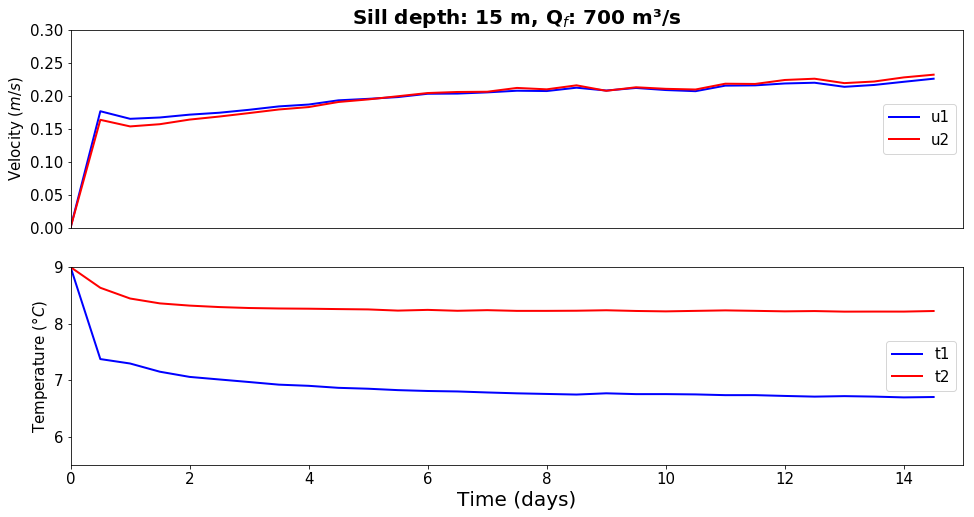

In [6]:
fig_path = "/Users/weiyangbao/Documents/Model_outputs/UTseries/"
#fig_path = "/home/1959/Jupyter_Figs/sill30/FrPseries/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
# Make plots
fig = plt.figure(figsize=(16,8))
#ax1.title('Sill depth = ' + str(sill_depth) + r' m, Q_s_g: ' + str(Qsg) + ' m\u00B3/s', size = 25, weight = 'bold')
# Plot velocity
ax1 = fig.add_subplot(211)
plt.plot(time[:30],u1[:30],'b-',linewidth=2)
plt.plot(time[:30],u2[:30],'r-',linewidth=2)

#ax1.axvline(x=xdist[x_sill],color='k',linestyle=':')
plt.legend(['u1','u2'], loc='right', fontsize=15)
ax1.set_xlim([0,15])
ax1.set_ylim([0,0.3])
ax1.tick_params(axis='y', labelsize=15)
ax1.set_ylabel('Velocity $(m/s)$',size = 15)
plt.title("Sill depth: " + str(Hs) + ' m, Q$_{f}$: ' + str(Qsg) + ' m\u00B3/s', size = 20, weight = 'bold')
ax1.axes.get_xaxis().set_visible(False)

# Plot temperature
ax2 = fig.add_subplot(212)
plt.plot(time[:30],t1[:30],'b-',linewidth=2)
plt.plot(time[:30],t2[:30],'r-',linewidth=2)
#ax2.axvline(x=xdist[x_sill],color='k',linestyle=':')
plt.legend(['t1','t2'], loc='right', fontsize=15)
ax2.set_xlim([0,15])
ax2.set_ylim([5.5,9])
ax2.tick_params(axis='x', labelsize=15)
ax2.tick_params(axis='y', labelsize=15)
ax2.set_ylabel('Temperature $(\degree C)$',size = 15)
ax2.set_xlabel('Time (days)', size = 20)

#fig.savefig(fig_path + '/Hs' + str(Hs) + '.png', dpi = 150, bbox_inches='tight')